# Proyecto Final Data Science
## Análisis de ventas en máquinas expendedoras
**Autor**: Juan Andrés Alfaro  
**Curso**: Data Science I
**Comisión**: 75660  
**Fecha**: 30 de mayo de 2025

Este proyecto tiene como objetivo explorar el comportamiento de las ventas de productos en máquinas expendedoras, con el fin de identificar patrones relevantes para el negocio utilizando modelos de machine learning.

# 1. Importación de Librerías, Configuración del Entorno y Carga del Dataset

In [3]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración del entorno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configuración moderna de gráficos
sns.set_theme(style='whitegrid', palette='muted')

# Cargar dataset
url = 'https://raw.githubusercontent.com/jota-1984/DataScience_1/refs/heads/main/vending_machine_sales.csv'
df = pd.read_csv(url)

# Primeras filas
df.head()


,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,5.0,1/1/2022
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,5.0,1/1/2022
3,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,1.5,1/1/2022
4,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022


# 2. Preguntas de interés e hipótesis

1. **¿Qué ubicaciones de máquinas expendedoras generan mayores ventas totales?**  
   - Hipótesis: Las ubicaciones en zonas de alto tráfico generan mayores ventas.

2. **¿El tipo de producto influye en el método de pago utilizado por los clientes?**  
   - Hipótesis: Productos más caros tienden a ser pagados con tarjeta de crédito.

3. **¿Existen patrones de comportamiento estacional o mensual en el volumen de ventas?**  
   - Hipótesis: Las ventas presentan estacionalidad a lo largo del año.

# 3. Análisis Exploratorio Inicial

In [9]:
# 4. Análisis exploratorio inicial

# Tamaño del dataset
print(f"El dataset contiene {df.shape[0]} filas y {df.shape[1]} columnas.")

# Tipos de datos
df.info()

# Valores nulos
missing_values = df.isnull().sum()
print("\nValores nulos por columna:")
print(missing_values[missing_values > 0])

El dataset contiene 9611 filas y 18 columnas.
<class 'pandas.core.frame.DataFrame'>
Index: 9611 entries, 0 to 9616
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Status       9611 non-null   object        
 1   Device ID    9611 non-null   object        
 2   Location     9611 non-null   object        
 3   Machine      9611 non-null   object        
 4   Product      9611 non-null   object        
 5   Category     9611 non-null   object        
 6   Transaction  9611 non-null   int64         
 7   TransDate    9611 non-null   datetime64[ns]
 8   Type         9611 non-null   object        
 9   RCoil        9611 non-null   int64         
 10  RPrice       9611 non-null   float64       
 11  RQty         9611 non-null   int64         
 12  MCoil        9611 non-null   int64         
 13  MPrice       9611 non-null   float64       
 14  MQty         9611 non-null   int64         
 15  LineTotal    9

In [5]:
df.head()

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,5.0,1/1/2022
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,5.0,1/1/2022
3,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,1.5,1/1/2022
4,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022


In [6]:
df.tail()

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
9612,Processed,VJ300320609,GuttenPlans,GuttenPlans x1367,Doritos Nacho Cheese,Food,16175373362,12/30/2022,Cash,112,1.5,1,112,1.5,1,1.5,1.5,12/30/2022
9613,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Poland Springs Water,Water,16176802941,12/31/2022,Cash,143,1.5,1,143,1.5,1,1.5,1.5,12/31/2022
9614,Processed,VJ300205292,Brunswick Sq Mall,BSQ Mall x1364 - Zales,Robert Irvine's - Fit Crunch - Chocolate Pea,Food,16176909481,12/31/2022,Cash,137,2.0,1,137,2.0,1,2.0,2.0,12/31/2022
9615,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Poland Springs Water,Water,16176914301,12/31/2022,Cash,143,1.5,1,143,1.5,1,1.5,1.5,12/31/2022
9616,Processed,VJ300205292,Brunswick Sq Mall,BSQ Mall x1364 - Zales,Coca Cola - Zero Sugar,Carbonated,16177325723,12/31/2022,Cash,140,1.5,1,140,1.5,1,1.5,1.5,12/31/2022


In [10]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Transaction,9611.0,15382309248.872126,14515778905.0,15039986842.5,15383458894.0,15738931961.0,16177325723.0,440337117.533234
TransDate,9611,2022-07-12 03:57:10.693996544,2022-01-01 00:00:00,2022-04-29 00:00:00,2022-07-14 00:00:00,2022-09-28 00:00:00,2022-12-31 00:00:00,NaN
RCoil,9611.0,132.986058,110.0,122.0,138.0,144.0,165.0,13.358922
RPrice,9611.0,1.958381,1.0,1.5,1.5,2.5,5.0,0.698778
RQty,9611.0,1.014775,1.0,1.0,1.0,1.0,3.0,0.127369
MCoil,9611.0,132.986058,110.0,122.0,138.0,144.0,165.0,13.358922
MPrice,9611.0,1.958381,1.0,1.5,1.5,2.5,5.0,0.698778
MQty,9611.0,1.014775,1.0,1.0,1.0,1.0,3.0,0.127369
LineTotal,9611.0,1.985667,1.0,1.5,1.5,2.5,8.0,0.744427
TransTotal,9611.0,2.220633,1.0,1.5,2.0,2.75,9.0,1.084731


# 4. Limpieza de Datos e Imputación de Valores Nulos

In [8]:

# Rellenar nulos numéricos
df['RPrice'] = df['RPrice'].fillna(df['RPrice'].median())
df['RQty'] = df['RQty'].fillna(1)
df['MPrice'] = df['MPrice'].fillna(df['MPrice'].median())
df['MQty'] = df['MQty'].fillna(1)

# Categóricos
df['Category'] = df['Category'].fillna('Unknown')
df['Type'] = df['Type'].fillna('Unknown')

# Convertir fechas
df['TransDate'] = pd.to_datetime(df['TransDate'], errors='coerce')

# Eliminar filas con valor Producto vacío (6 filas )
df = df.dropna(subset=['Product'])

# Ver resumen de valores nulos
df.isnull().sum()

,0
Status,0
Device ID,0
Location,0
Machine,0
Product,0
Category,0
Transaction,0
TransDate,0
Type,0
RCoil,0


# 5. Gráficos

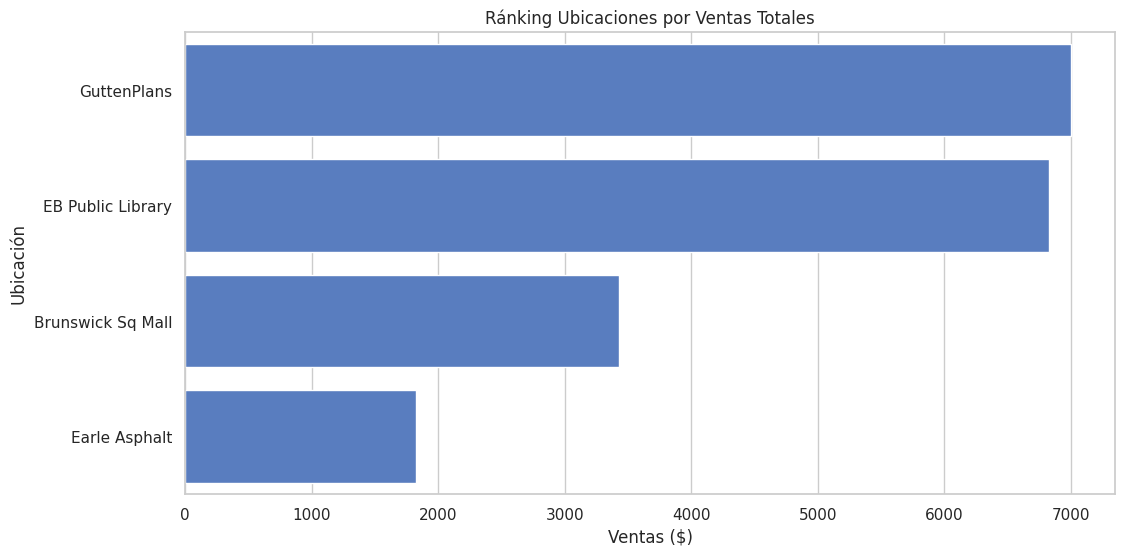

In [12]:
# Gráfico 1: Ránking Ubicaciones por Ventas Totales

ventas_por_ubicacion = df.groupby('Location')['LineTotal'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=ventas_por_ubicacion.values, y=ventas_por_ubicacion.index)
plt.title('Ránking Ubicaciones por Ventas Totales')
plt.xlabel('Ventas ($)')
plt.ylabel('Ubicación')
plt.show()

**Análisis Gráfico 1**:  
Las ubicaciones GluttenPlans y EB Public Library concentran la mayor parte de las ventas. Esto sugiere la importancia estratégica de la localización para maximizar ingresos.

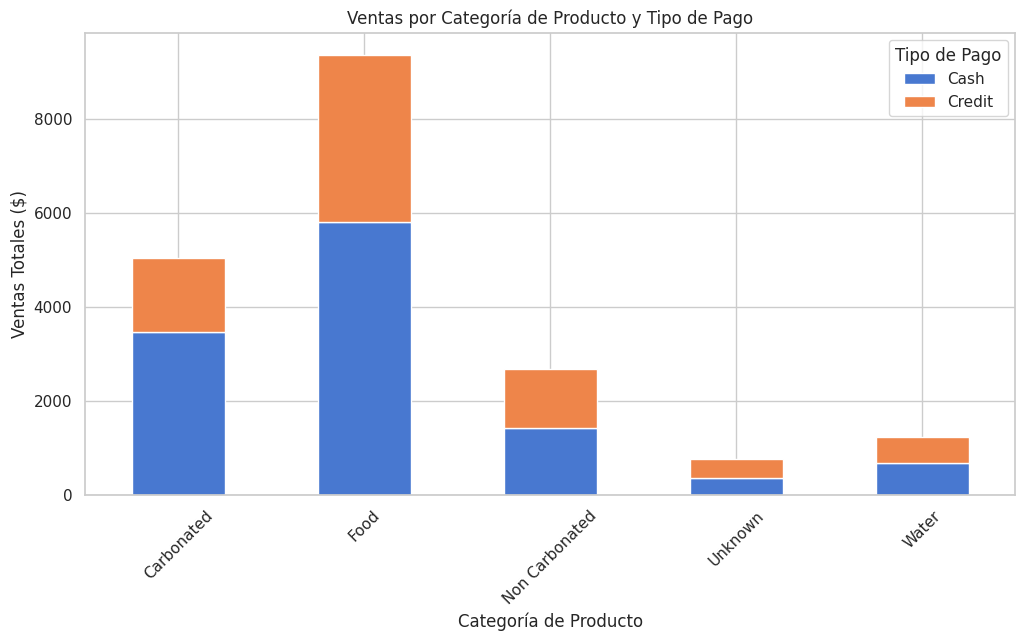

In [13]:
# Gráfico 2: Ventas por Categoría de Producto y Tipo de Pago

categoria_pago = df.groupby(['Category', 'Type'])['LineTotal'].sum().unstack().fillna(0)

categoria_pago.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Ventas por Categoría de Producto y Tipo de Pago')
plt.xlabel('Categoría de Producto')
plt.ylabel('Ventas Totales ($)')
plt.legend(title='Tipo de Pago')
plt.xticks(rotation=45)
plt.show()


**Análisis Gráfico 2**:  
Se observa que la mayoría de las transacciones, especialmente en la categoría "Food", son realizadas mediante tarjeta de débito.


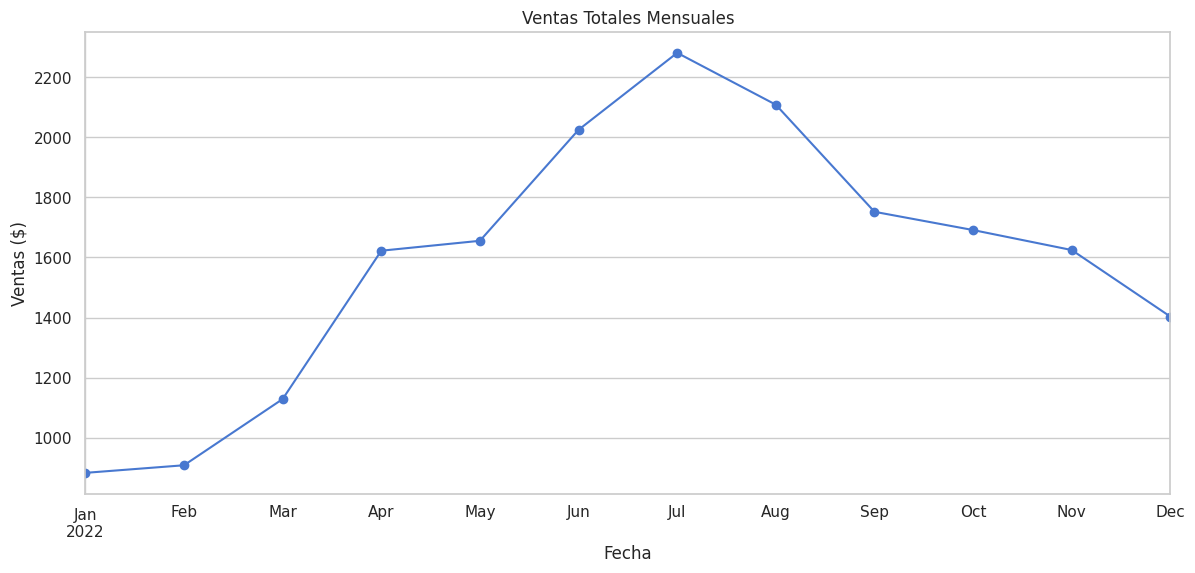

In [14]:
# Gráfico 3: Ventas Totales Mensuales

df['TransDate'] = pd.to_datetime(df['TransDate'])

ventas_por_mes = df.resample('ME', on='TransDate')['LineTotal'].sum()

plt.figure(figsize=(14,6))
ventas_por_mes.plot(marker='o')
plt.title('Ventas Totales Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas ($)')
plt.grid(True)
plt.show()


**Análisis Gráfico 3**:  
El análisis de ventas mensuales deja en evidencia un peak muy marcado durante los meses de verano (del hemisferio norte).

# 6. Variable Objetivo
  
  - Para este modelo y los pasos a continuación se eligió la variable `TransTotal` como variable objetivo, ya que representa el **monto total de una transacción**, entregando una visión más completa del comportamiento de compra que `LineTotal` (que solo representa un ítem).

# 7. Modelado

In [16]:
# Selección de variables predictoras
X = df[['Category', 'Type', 'RPrice', 'RQty', 'Location']]
y = df['TransTotal']

# One-hot encoding para variables categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

In [17]:
# Feature selection
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X_encoded, y)
selected_features = X_encoded.columns[selector.get_support()]
print("Variables seleccionadas:", list(selected_features))

Variables seleccionadas: ['RPrice', 'RQty', 'Category_Food', 'Category_Non Carbonated', 'Category_Unknown', 'Category_Water', 'Type_Credit', 'Location_EB Public Library', 'Location_Earle Asphalt', 'Location_GuttenPlans']


In [18]:
# División en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded[selected_features], y, test_size=0.2, random_state=42)

In [19]:
# Entrenamiento del modelo
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:
# Evaluación del modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # Cálculo manual de RMSE
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 0.30
RMSE: 0.65
R²: 0.64


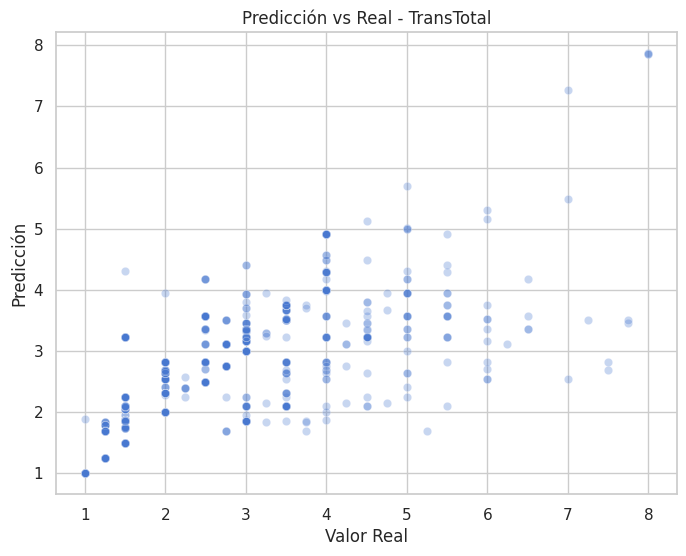

In [22]:
# Gráfico de resultados
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.xlabel("Valor Real")
plt.ylabel("Predicción")
plt.title("Predicción vs Real - TransTotal")
plt.grid(True)
plt.show()

# Conclusión y Siguientes Pasos

- El modelo Random Forest logró predecir el monto total de la transacción (`TransTotal`) con un R² de 0,64.
- Las variables más relevantes fueron: ['RPrice', 'RQty', 'Category_Food', 'Category_Non Carbonated', 'Category_Unknown', 'Category_Water', 'Type_Credit', 'Location_EB Public Library', 'Location_Earle Asphalt', 'Location_GuttenPlans'].
- El modelo tiene una razonable capacidad explicativa y puede ser útil para entender patrones de gasto.
- Se imputaron correctamente los valores nulos.

**Siguientes pasos posibles**:
- Evaluar modelos más avanzados.
- Incluir variables de tiempo (día de la semana, hora).
- Usar validación cruzada para mayor robustez.